In [123]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
def load_entire_hdf5(dct):
    if isinstance(dct, h5py.Dataset):
        return dct[()]
    ret = {}
    for k, v in dct.items():
        ret[k] = load_entire_hdf5(v)
    return ret
train=h5py.File("data/train_1000.h5", mode="r")
train_data = load_entire_hdf5(train)
train.close()
train=h5py.File("data/test_600.h5", mode="r")
test_data = load_entire_hdf5(train)
train.close()
def display(data, traj_id):
    episode = data[traj_id]
    colors = np.array(episode['rgbs'])
    shots = len(colors)
    # plt.figure(figsize=(16,5))
    # for i in range(shots):
    #     plt.subplot(1, shots, i+1)
    #     plt.imshow(colors[i]/255)

    depths = np.array(episode['depths'])[:, :, :, 0]
    extrinsics = np.array(episode['cam_exts'])
    intrinsics = np.array(episode['cam_ints'])
    obs = dict(
        color=colors,
        depth=depths,
        extrinsics=extrinsics,
        intrinsics=intrinsics
    )
    action = dict(
        pose0=(episode['action']['p'][0], episode['action']['q'][0]),
        pose1=(episode['action']['p'][1], episode['action']['q'][1])
    )
    bounds = np.array([[-0.16, 0.16], [-0.32, 0.32], [-1, 0.06]])
    pix_size = 0.002
    import utils.vision as maniskill_utils
    cmap, hmap = maniskill_utils.get_fused_image(
        obs["color"],
        obs["depth"],
        obs["extrinsics"],
        obs["intrinsics"],
        pix_size,
    )
    import ravens.utils.utils as utils
    p0_xyz, p0_xyzw = action["pose0"]
    p1_xyz, p1_xyzw = action["pose1"]
    p0 = utils.xyz_to_pix(p0_xyz, bounds, pix_size)
    p0_theta = -np.float32(utils.quatXYZW_to_eulerXYZ(p0_xyzw)[2])
    p1 = utils.xyz_to_pix(p1_xyz, bounds, pix_size)
    p1_theta = -np.float32(utils.quatXYZW_to_eulerXYZ(p1_xyzw)[2])
    p1_theta = p1_theta - p0_theta
    p0_theta = 0

    figure = plt.figure()
    plt.title("Fused Bird Eye View")
    plt.imshow(cmap[:,:,:3]/255)
    plt.plot(p0[1], p0[0], "xr", markersize=5)
    plt.plot(p1[1], p1[0], "xg", markersize=5)
    plt.tight_layout()

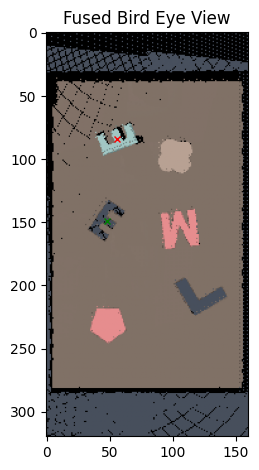

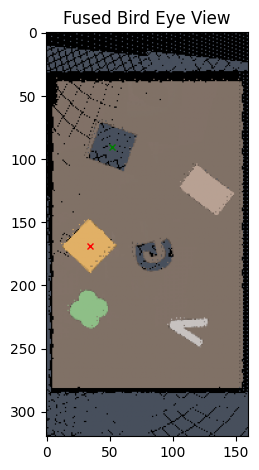

In [124]:
display(train_data, "traj_0")
display(train_data, "traj_322")

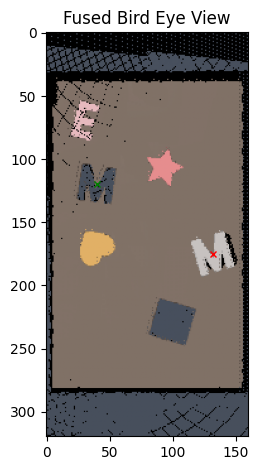

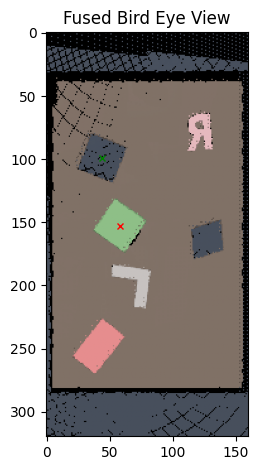

In [125]:
display(test_data, "traj_0")
display(test_data, "traj_322")

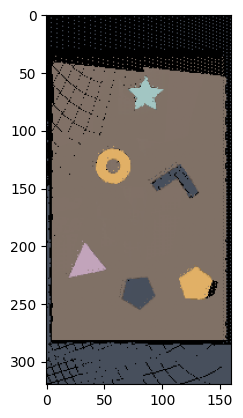

In [183]:
sample=np.load("sample.npy",allow_pickle=True)
# p0,p1 =sample[1], sample[3]
# plt.plot(p0[1], p0[0], "xr", markersize=5)
# plt.plot(p1[1], p1[0], "xg", markersize=5)
plt.imshow(sample[0][:,:,:3]/255)

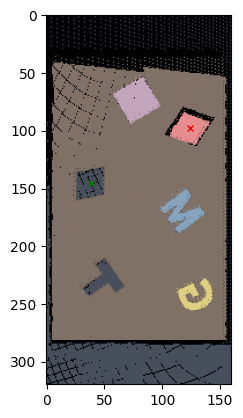

In [187]:
sample=np.load("sample.npy",allow_pickle=True)  
p0,p1 =sample[1], sample[3]
plt.plot(p0[1], p0[0], "xr", markersize=5)
plt.plot(p1[1], p1[0], "xg", markersize=5)
plt.imshow(sample[0][:,:,:3]/255)

In [ ]:
sample